# First Thoughts

## For now, "Newscatcher API" seems like a better source for the following reasons:

- Same functionality as NewsAPI
- 50€/100€ Cheaper
- Python SDK is not 3rd party, but from the API provider themselves
- We have the opportunity to get free access for the project

### This one is big

***NewsAPi does NOT provide full-body article data (even when buying the paid version)***

***Newscatcher explicitly states that from the 399€ upwards version, one receives "full-body" articles***

### ***Also, Newscatcher is based in Paris :)***

# Newscatcher API

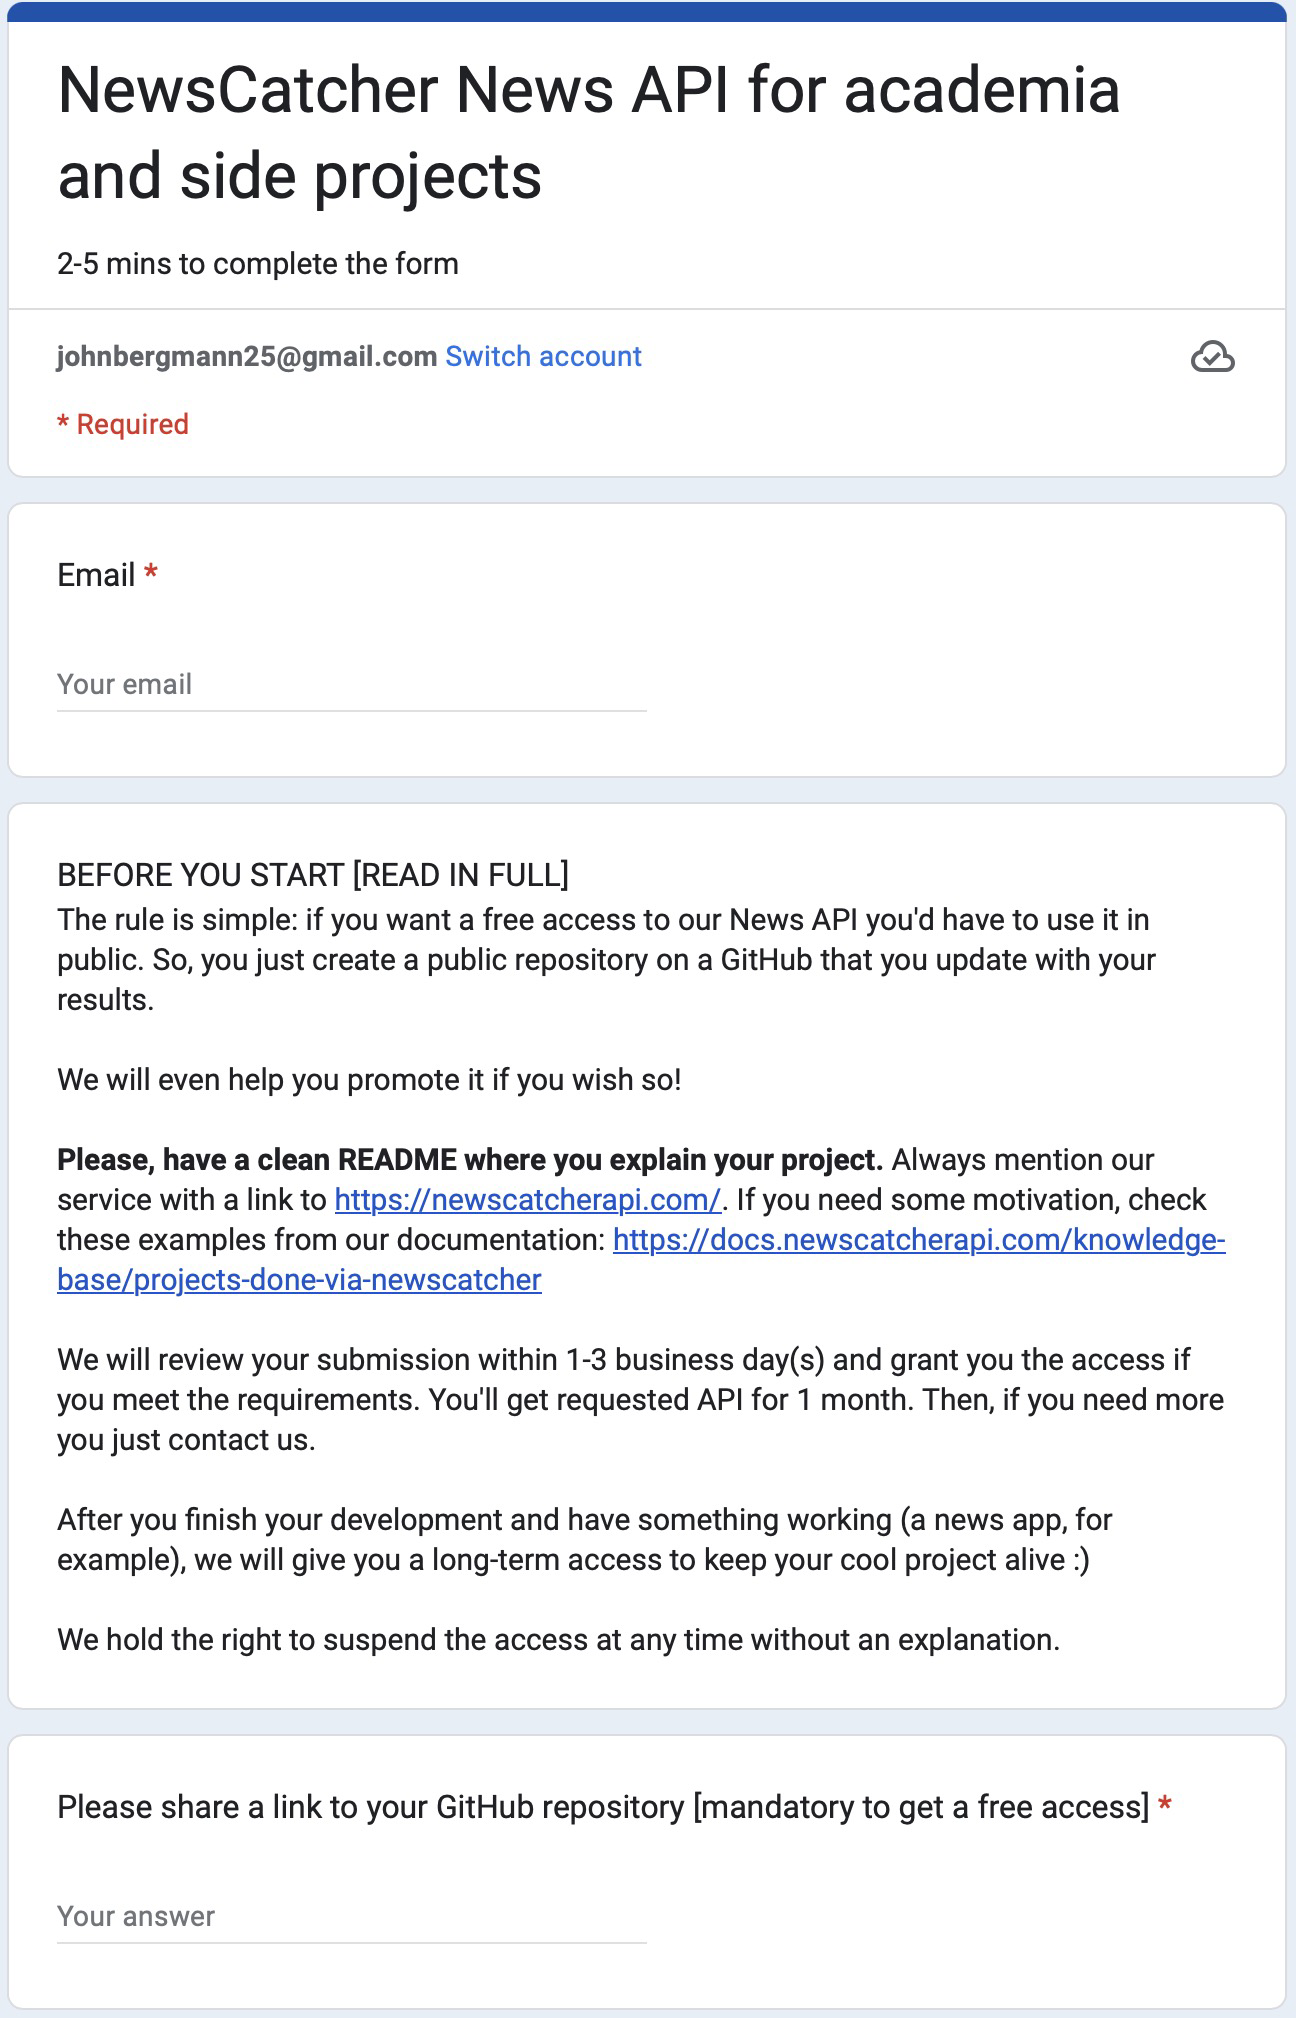

Can try to request Free-Access for this project. Afterwards RB would have to buy the 400/monthly plan (probably)

https://docs.google.com/forms/d/e/1FAIpQLSejrsj4a1ZQkIasiKCtyaWbeaMb7iZ-TOPi5BHyUEGwnVSR9A/viewform

In [53]:
from newscatcherapi import NewsCatcherApiClient
import pandas as pd

https://github.com/NewscatcherAPI/newscatcherapi-sdk-python

In [45]:
newscatcherapi = NewsCatcherApiClient(x_api_key="3wPWLDpVsBIrfzD037Q_2ieTVGDpMD2NFEMiZKEDUZ8")

In [106]:
catcher_sources = newscatcherapi.get_sources()

NewsCatcherApiException: {'status': 'error', 'error_code': 'LimitReached', 'message': 'Monthly API calls limit reached: 50'}

In [ ]:
sources_df = pd.DataFrame(sources["sources"])
sources_df[sources_df["language"]=="en"].head(10)

In [95]:
all_articles = newscatcherapi.get_search(q="Donald Trump",
                                         lang="en")

NewsCatcherApiException: {'status': 'error', 'error_code': 'LimitReached', 'message': 'Monthly API calls limit reached: 50'}

In [50]:
all_articles.keys()

dict_keys(['status', 'total_hits', 'page', 'total_pages', 'page_size', 'articles', 'user_input'])

In [59]:
news = all_articles["articles"]
df = pd.DataFrame(news)
df.head(3)

,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,rank,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id
0,Second hush money case related to Donald Trump...,Mallika Soni,2023-03-31 12:21:48,full,https://www.hindustantimes.com/world-news/kare...,hindustantimes.com,Karen McDougal- Donald Trump Case: The office ...,The Manhattan grand jury is investigating a hu...,hindustantimes.com,980,world,IN,en,Mallika Soni,https://www.hindustantimes.com/ht-img/img/2023...,False,@httweets,15.273647,cf12db67b3e56c3c69495e3808cfaedc
1,Not above the law rally,Jana DeCamilla,2023-03-31 19:05:00,full,https://poststar.com/not-above-the-law-rally/c...,poststar.com,Click here to view this item from http://www.p...,Not Above the Law rally\nProtesters at the Not...,poststar.com,15310,news,US,en,Jana DeCamilla,https://bloximages.chicago2.vip.townnews.com/p...,False,@poststar,15.247580,7bb2b9d8718037c76feb3826cf98ae94
2,"""This P**** Grabbed Back"": Adult Film Star Hai...",NDTV News Desk,2023-04-01 07:29:58,full,https://www.ndtv.com/world-news/this-p-grabbed...,ndtv.com,Adult actress Stormy Daniels has said that she...,Donald Trump is the first US President (former...,ndtv.com,920,news,IN,en,NDTV News Desk,https://c.ndtvimg.com/2023-03/eeq5omk8_donald-...,False,@ndtv,15.189615,fed71f1bece7d142710158dd64e4d1a3


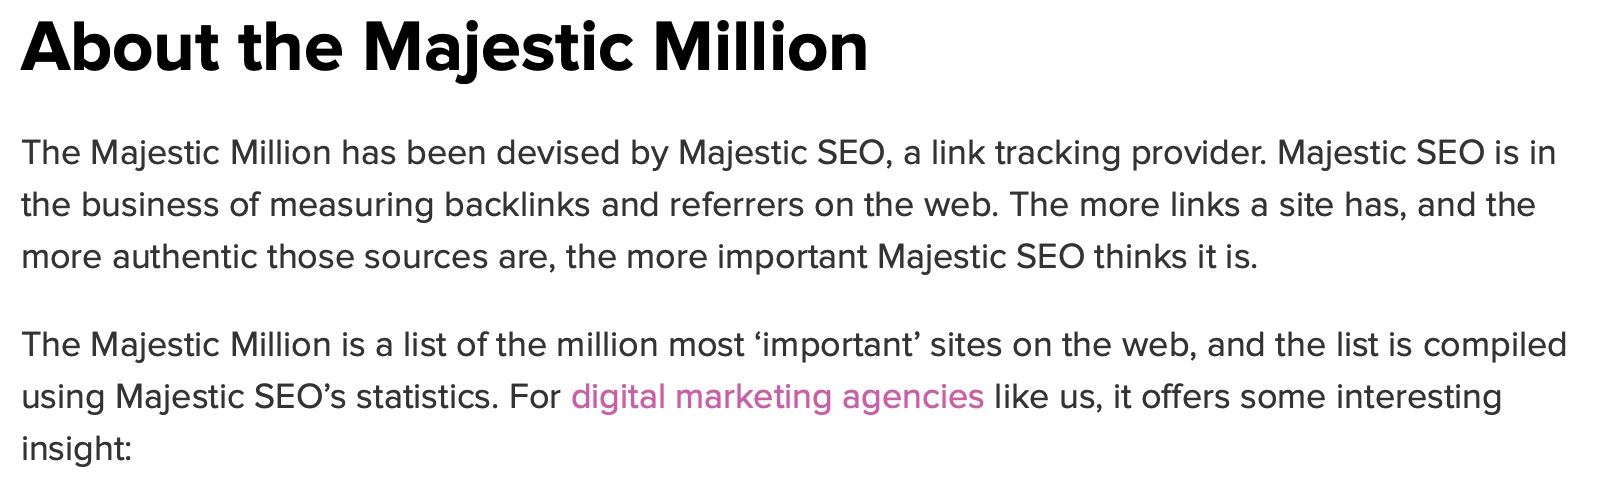

In [91]:
# Group Sources by rank (based on About the Majestic Million SEO Ranking)
sorted = df.groupby("rank")
top20 = sorted["clean_url"].value_counts().head(20)

In [93]:
top20

rank  clean_url          
31    yahoo.com              217
40    nytimes.com              4
49    forbes.com              12
60    theguardian.com          5
61    cnn.com                 17
69    bbc.co.uk                5
79    bbc.com                  7
81    reuters.com             22
83    washingtonpost.com      11
89    wsj.com                  2
90    imdb.com                 2
92    bloomberg.com            4
100   msn.com                137
102   bing.com                 2
106   businessinsider.com     17
120   go.com                  17
123   telegraph.co.uk          8
125   time.com                 2
126   usatoday.com            48
127   dailymail.co.uk         39
Name: clean_url, dtype: int64

In [94]:
# How many News Articles do we get from the "top20" ranked ones?
top20.sum()

578

# News API

In [97]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='b9ac3739257d4c0d85e53a9493f28d94')

https://github.com/mattlisiv/newsapi-python

In [98]:
# /v2/top-headlines/sources
sources = newsapi.get_sources()

In [105]:
sources_df = pd.DataFrame(sources["sources"])
sources_df[sources_df["language"]=="en"].head(10)

,id,name,description,url,category,language,country
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
6,ars-technica,Ars Technica,The PC enthusiast's resource. Power users and ...,http://arstechnica.com,technology,en,us
8,associated-press,Associated Press,The AP delivers in-depth coverage on the inter...,https://apnews.com/,general,en,us
9,australian-financial-review,Australian Financial Review,The Australian Financial Review reports the la...,http://www.afr.com,business,en,au
10,axios,Axios,Axios are a new media company delivering vital...,https://www.axios.com,general,en,us
11,bbc-news,BBC News,"Use BBC News for up-to-the-minute news, breaki...",http://www.bbc.co.uk/news,general,en,gb
12,bbc-sport,BBC Sport,The home of BBC Sport online. Includes live sp...,http://www.bbc.co.uk/sport,sports,en,gb
15,bleacher-report,Bleacher Report,"Sports journalists and bloggers covering NFL, ...",http://www.bleacherreport.com,sports,en,us


In [111]:
# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          language='en')

# /v2/everything
all_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      page=2)

In [112]:
top_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [114]:
df2 = pd.DataFrame(all_articles["articles"])

In [115]:
df2.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Dominic Basulto),What Do New NFTs Mean for Bitcoin's Future Val...,Bitcoin NFTs are an interesting phenomenon but...,https://www.fool.com/investing/2023/03/06/what...,https://g.foolcdn.com/editorial/images/723253/...,2023-03-06T11:05:00Z,New non-fungible tokens (NFTs) from Bitcoin kn...
1,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Dominic Basulto),Still Not Ready to Buy Bitcoin? Invest in Thes...,"Coinbase Global, MicroStrategy, and PayPal cou...",https://www.fool.com/investing/2023/03/24/not-...,https://g.foolcdn.com/editorial/images/725659/...,2023-03-24T15:33:00Z,Bitcoin(BTC -2.43%) has been on a remarkable r...
2,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (RJ Fulton),Is Bitcoin the Future of Banking?,"Up more than 30% in the last two weeks, Bitcoi...",https://www.fool.com/investing/2023/03/25/is-b...,https://g.foolcdn.com/editorial/images/725676/...,2023-03-25T16:37:00Z,Many believe that the recent turmoil in the ba...
3,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Dominic Basulto),Does Bitcoin Belong in Your Retirement Portfolio?,Investors expecting Bitcoin to turbocharge the...,https://www.fool.com/investing/2023/03/09/does...,https://g.foolcdn.com/editorial/images/723681/...,2023-03-09T13:05:00Z,After U.S. lawmakers reintroduced the Financia...
4,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Travis Hoium),Bitcoin Mining Stocks Skyrocket Higher Today,Bitcoin's pop is helping miners today.,https://www.fool.com/investing/2023/03/14/bitc...,https://g.foolcdn.com/editorial/images/724623/...,2023-03-14T17:20:14Z,What happened\r\nBitcoin(BTC 7.14%) mining sto...


# Other APIs to consider

- https://webz.io/data-apis/news-api
- https://www.newsapi.ai